In [1]:
from spamdfba import toolkit as tk
from spamdfba import toymodels as tm
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import warnings
import multiprocessing as mp
import json

2024-01-08 09:56:13,499	INFO worker.py:1724 -- Started a local Ray instance.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Cou

In [2]:
NUM_CORES = 8
warnings.filterwarnings("ignore")

In [3]:
agent1=tk.Agent("agent1",
				model=tm.Toy_Model_NE_Aux_1,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S',"A","B"],
				actions=['A_e','B_e'],
				gamma=1,
				)
agent2=tk.Agent("agent2",
				model=tm.Toy_Model_NE_Aux_2,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S',"A","B"],
				actions=['A_e','B_e'],
				gamma=1)
agents=[agent1,agent2]

env_aux=tk.Environment(name="Toy-NECOM-Auxotrophs",
 					agents=agents,
 					dilution_rate=0.0001,
 					extracellular_reactions=[],
 					initial_condition={"S":100,"agent1":0.1,"agent2":0.1},
 					inlet_conditions={"S":100},
 							dt=0.1,
 							number_of_batches=5000,
 							episodes_per_batch=int(NUM_CORES/2),)

In [23]:
sim_aux=tk.Simulation(name=env_aux.name,
                  env=env_aux,
                  save_dir="./Results/",
                  )

In [38]:
sim_aux.run(verbose=False)

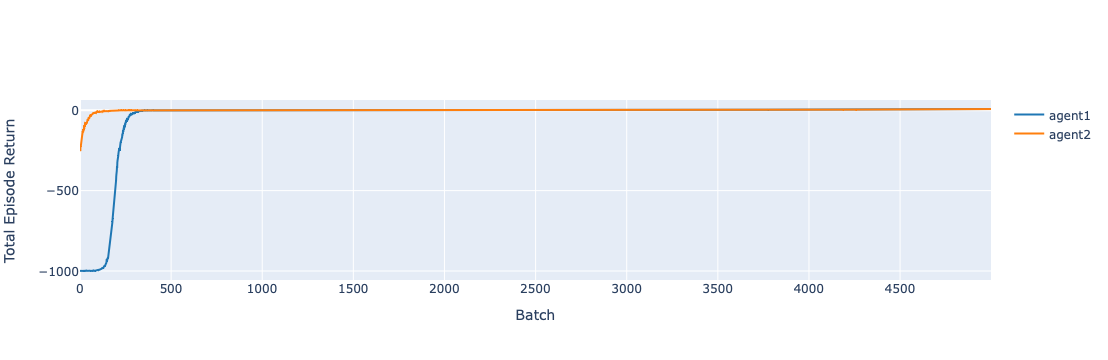

In [25]:
fig_aux=sim_aux.plot_learning_curves()

In [26]:
fig_aux.write_image(env_aux.name+"_learning_curve.svg")

In [27]:
time_aux=sim_aux.print_training_times()

                        Simulation times                         
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Level        ┃ Mean(s)               ┃ STD(s)                 ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Optimization │ 0.00032502077644999   │ 6.097844251016754e-05  │
│ Step         │ 0.0011583550271250106 │ 0.00022706778960370164 │
│ Batch        │ 0.3642500801999978    │ 0.048618568158497945   │
│ Simulation   │ 2561.5439219997766    │ NA                     │
└──────────────┴───────────────────────┴────────────────────────┘

In [28]:
with open(env_aux.name+"_Runtime.json","w") as f:
    json.dump(time_aux,f)

In [29]:
agent1=tk.Agent("agent1",
				model=tm.Toy_Model_NE_Mut_1,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S',"A","B"],
				actions=['A_e','B_e'],
				gamma=1,
				)
agent2=tk.Agent("agent2",
				model=tm.Toy_Model_NE_Mut_2,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S',"A","B"],
				actions=['A_e','B_e'],
				gamma=1)
agents=[agent1,agent2]

env_fac=tk.Environment(name="Toy-NECOM-Facultative",
 					agents=agents,
 					dilution_rate=0.0001,
 					extracellular_reactions=[],
 					initial_condition={"S":100,"agent1":0.1,"agent2":0.1,"A":0,"B":0},
 					inlet_conditions={"S":100},
 							dt=0.1,
 							number_of_batches=5000,
 							episodes_per_batch=4,)

In [30]:
sim_fac=tk.Simulation(name=env_fac.name,
                  env=env_fac,
                  save_dir="./Results/",
                  )

In [37]:
sim_fac.run(verbose=False)

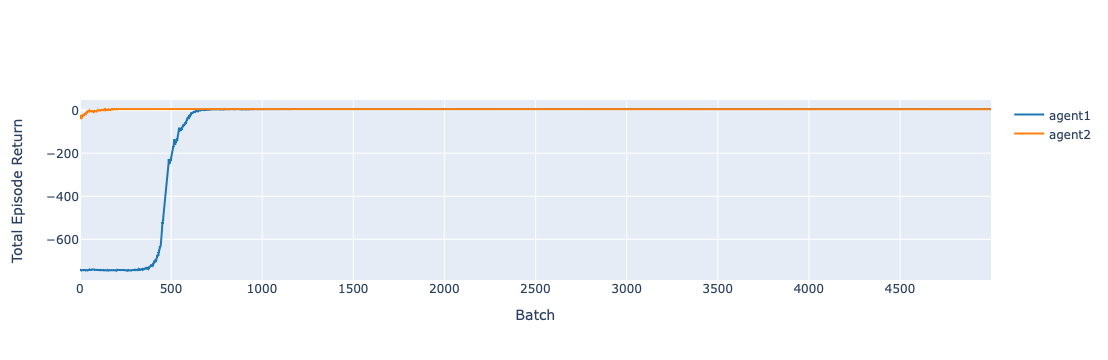

In [33]:
fig_fac=sim_fac.plot_learning_curves()

In [34]:
fig_fac.write_image(env_fac.name+"_learning_curve.svg")

In [35]:
time_fac=sim_fac.print_training_times()

                         Simulation times                         
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Level        ┃ Mean(s)                ┃ STD(s)                 ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Optimization │ 0.00035886619994984233 │ 2.4024276334344793e-05 │
│ Step         │ 0.0012223559303251473  │ 7.378304576128785e-05  │
│ Batch        │ 0.38118410700000394    │ 0.040204447228493395   │
│ Simulation   │ 2658.2730999999026     │ NA                     │
└──────────────┴────────────────────────┴────────────────────────┘

In [36]:
with open(env_fac.name+"_Runtime.json","w") as f:
    json.dump(time_fac,f)

What happens if we have two agents similar to the previous example, but this time they do not compete for the same resources. Would they collaborate? Let's see.

### Model definition

In [48]:
from cobra import Model, Reaction, Metabolite
Toy_Model_NE_Mut_NO_1 = Model('Toy_1_Mut_NO')
					   
EX_S1_sp1 = Reaction('S1_e')
S1 = Metabolite('S1', compartment='c')
EX_S1_sp1.add_metabolites({S1: -1})
EX_S1_sp1.lower_bound = -10
EX_S1_sp1.upper_bound = 0
Toy_Model_NE_Mut_NO_1.add_reactions([EX_S1_sp1])


EX_A_sp1 = Reaction('A_e')
A = Metabolite('A', compartment='c')
EX_A_sp1.add_metabolites({A: -1})
EX_A_sp1.lower_bound = -100
EX_A_sp1.upper_bound = 100
Toy_Model_NE_Mut_NO_1.add_reactions([EX_A_sp1])


EX_B_sp1 = Reaction('B_e')
B = Metabolite('B', compartment='c')
EX_B_sp1.add_metabolites({B: -1})
EX_B_sp1.lower_bound = -100
EX_B_sp1.upper_bound = 100
Toy_Model_NE_Mut_NO_1.add_reactions([EX_B_sp1])



EX_P_sp1 = Reaction('P_e')
P = Metabolite('P', compartment='c')
EX_P_sp1.add_metabolites({P:-1})
EX_P_sp1.lower_bound = 0
EX_P_sp1.upper_bound = 100
Toy_Model_NE_Mut_NO_1.add_reactions([EX_P_sp1])


R_1_sp1 = Reaction('R_1_sp1')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
R_1_sp1.add_metabolites({ADP: -2, S1: -1, P: 1, ATP: 2})
R_1_sp1.lower_bound = 0
R_1_sp1.upper_bound = 1000
Toy_Model_NE_Mut_NO_1.add_reactions([R_1_sp1])


R_2_sp1 = Reaction('R_2_sp1')
R_2_sp1.add_metabolites({ADP: 1, P: -1, B: 3, ATP: -1})
R_2_sp1.lower_bound = 0
R_2_sp1.upper_bound = 1000
Toy_Model_NE_Mut_NO_1.add_reactions([(R_2_sp1)])


R_3_sp1 = Reaction('R_3_sp1')
R_3_sp1.add_metabolites({ADP: 6, P: -1, A: 1, ATP: -6})
R_3_sp1.lower_bound = 0
R_3_sp1.upper_bound = 1000
Toy_Model_NE_Mut_NO_1.add_reactions([R_3_sp1])



R_4_sp1 = Reaction('R_4_sp1')
R_4_sp1.add_metabolites({ADP:1 ,ATP: -1})
R_4_sp1.lower_bound = 0
R_4_sp1.upper_bound = 1000
Toy_Model_NE_Mut_NO_1.add_reactions([R_4_sp1])


OBJ_sp1 = Reaction("OBJ_sp1")
biomass_sp1 = Metabolite('biomass_sp1', compartment='c')
OBJ_sp1.add_metabolites({ADP:5 ,ATP: -5,biomass_sp1:0.1,A:-5,B:-5})
OBJ_sp1.lower_bound = 0
OBJ_sp1.upper_bound = 1000
Toy_Model_NE_Mut_NO_1.add_reactions([OBJ_sp1])

Biomass_1 = Reaction("Biomass_1")
Biomass_1.add_metabolites({biomass_sp1:-1})
Biomass_1.lower_bound = 0
Biomass_1.upper_bound = 1000
Toy_Model_NE_Mut_NO_1.add_reactions([Biomass_1])

Toy_Model_NE_Mut_NO_1.objective='Biomass_1'
Toy_Model_NE_Mut_NO_1.biomass_ind=9
Toy_Model_NE_Mut_NO_1.exchange_reactions=tuple([Toy_Model_NE_Mut_NO_1.reactions.index(i) for i in Toy_Model_NE_Mut_NO_1.exchanges])



Toy_Model_NE_Mut_NO_2 = Model('Toy_2_Mut_NO')

EX_S2_sp2 = Reaction('S2_e')
S2 = Metabolite('S2', compartment='c')
EX_S2_sp2.add_metabolites({S2: -1})
EX_S2_sp2.lower_bound = -10
EX_S2_sp2.upper_bound = 0
Toy_Model_NE_Mut_NO_2.add_reactions([EX_S2_sp2])


EX_A_sp2 = Reaction('A_e')
A = Metabolite('A', compartment='c')
EX_A_sp2.add_metabolites({A: -1})
EX_A_sp2.lower_bound = -100
EX_A_sp2.upper_bound = 100
Toy_Model_NE_Mut_NO_2.add_reactions([EX_A_sp2])


EX_B_sp2 = Reaction('B_e')
B = Metabolite('B', compartment='c')
EX_B_sp2.add_metabolites({B: -1})
EX_B_sp2.lower_bound = -100
EX_B_sp2.upper_bound = 100
Toy_Model_NE_Mut_NO_2.add_reactions([EX_B_sp2])


EX_P_sp2 = Reaction('P_e')
P = Metabolite('P', compartment='c')
EX_P_sp2.add_metabolites({P:-1})
EX_P_sp2.lower_bound = 0
EX_P_sp2.upper_bound = 100
Toy_Model_NE_Mut_NO_2.add_reactions([EX_P_sp2])


R_1_sp2 = Reaction('R_1_sp2')
ADP = Metabolite('ADP', compartment='c')
ATP = Metabolite('ATP', compartment='c')
R_1_sp2.add_metabolites({ADP: -2, S2: -1, P: 1, ATP: 2})
R_1_sp2.lower_bound = 0
R_1_sp2.upper_bound = 1000
Toy_Model_NE_Mut_NO_2.add_reactions([R_1_sp2])


R_2_sp2 = Reaction('R_2_sp2')
R_2_sp2.add_metabolites({ADP: 1, P: -1, B: 3, ATP: -1})
R_2_sp2.lower_bound = 0
R_2_sp2.upper_bound = 1000
Toy_Model_NE_Mut_NO_2.add_reactions([(R_2_sp2)])

R_3_sp2 = Reaction('R_3_sp2')
R_3_sp2.add_metabolites({ADP: 6, P: -1, A: 1, ATP: -6})
R_3_sp2.lower_bound = 0
R_3_sp2.upper_bound = 1000
Toy_Model_NE_Mut_NO_2.add_reactions([R_3_sp2])

R_4_sp2 = Reaction('R_4_sp2')
R_4_sp2.add_metabolites({ADP:1 ,ATP: -1})
R_4_sp2.lower_bound = 0
R_4_sp2.upper_bound = 1000
Toy_Model_NE_Mut_NO_2.add_reactions([R_4_sp2])

OBJ_sp2 = Reaction("OBJ_sp2")
biomass_sp2 = Metabolite('biomass_sp2', compartment='c')
OBJ_sp2.add_metabolites({ADP:5 ,ATP: -5,biomass_sp2:0.1,A:-5,B:-5})
OBJ_sp2.lower_bound = 0
OBJ_sp2.upper_bound = 1000
Toy_Model_NE_Mut_NO_2.add_reactions([OBJ_sp2])

Biomass_2 = Reaction("Biomass_2")
Biomass_2.add_metabolites({biomass_sp2:-1})
Biomass_2.lower_bound = 0
Biomass_2.upper_bound = 1000
Toy_Model_NE_Mut_NO_2.add_reactions([Biomass_2])

Toy_Model_NE_Mut_NO_2.objective='Biomass_2'
Toy_Model_NE_Mut_NO_2.biomass_ind=9
Toy_Model_NE_Mut_NO_2.exchange_reactions=tuple([Toy_Model_NE_Mut_NO_2.reactions.index(i) for i in Toy_Model_NE_Mut_NO_2.exchanges])


Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [50]:
agent1=tk.Agent("agent1",
				model=Toy_Model_NE_Mut_NO_1,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S1','S2',"A","B"],
				actions=['A_e','B_e'],
				gamma=1,
				)
agent2=tk.Agent("agent2",
				model=Toy_Model_NE_Mut_NO_2,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S1','S2',"A","B"],
				actions=['A_e','B_e'],
				gamma=1)
agents=[agent1,agent2]

env_mut_NO=tk.Environment(name="Toy-NECOM-No-overlap-muts",
 					agents=agents,
 					dilution_rate=0.0001,
 					extracellular_reactions=[],
 					initial_condition={"S1":500,"S2":500,"agent1":0.1,"agent2":0.1},
 					inlet_conditions={"S1":500,"S2":500},
 							dt=0.1,
 							number_of_batches=5000,
 							episodes_per_batch=int(NUM_CORES/2),)

In [51]:
sim_mut_NO=tk.Simulation(name=env_mut_NO.name,
                  env=env_mut_NO,
                  save_dir="./Results/",
                  )

In [52]:
sim_mut_NO.run(verbose=True)

Hold on, bringing the creitc network to range ...
Done!
Hold on, bringing the creitc network to range ...
Done!
Batch 0 finished:
agent1 return was:  -124.42208676821835
agent2 return was:  -255.65467733410765
Batch 1 finished:
agent1 return was:  -129.98290152915075
agent2 return was:  -253.4442251636438
Batch 2 finished:
agent1 return was:  -121.44257155135833
agent2 return was:  -252.67906100476247
Batch 3 finished:
agent1 return was:  -128.58764465239204
agent2 return was:  -253.4577689808885
Batch 4 finished:
agent1 return was:  -120.65413652440705
agent2 return was:  -255.48074084120861
Batch 5 finished:
agent1 return was:  -124.16345699125515
agent2 return was:  -256.18204835104007
Batch 6 finished:
agent1 return was:  -121.83633071296414
agent2 return was:  -257.4661054894864
Batch 7 finished:
agent1 return was:  -117.34839245891436
agent2 return was:  -256.40109500943515
Batch 8 finished:
agent1 return was:  -107.02119142710933
agent2 return was:  -253.93892081860417
Batch 9 f

In [53]:
import pickle 
with open("/Users/parsaghadermarzi/Desktop/Academics/Projects/SPAM-DFBA/examples/Results/Toy-NECOM-No-overlap-muts/Toy-NECOM-No-overlap-muts_4800_acts.pkl","rb") as f:
    acts=pickle.load(f)



In [54]:
acts["agent1"]=acts["agent1"].reshape(4,1000,2).mean(axis=0)
acts["agent2"]=acts["agent2"].reshape(4,1000,2).mean(axis=0)


<Axes: >

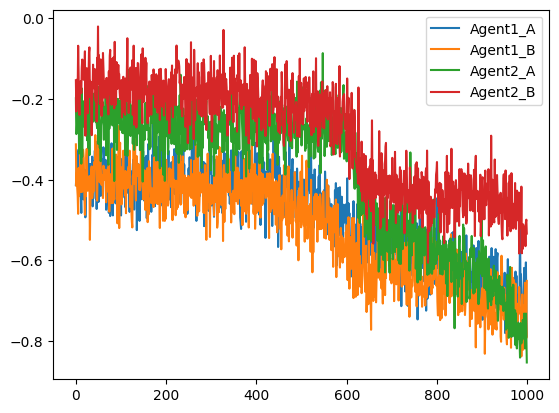

In [55]:
pd.DataFrame(torch.hstack([acts["agent1"],acts["agent2"]]).numpy(),columns=["Agent1_A","Agent1_B","Agent2_A","Agent2_B"]).plot()

In [57]:
agent1=tk.Agent("agent1",
				model=Toy_Model_NE_Mut_NO_1,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S1','S2',"A","B"],
				actions=['A_e','B_e'],
				gamma=1,
				)
agent2=tk.Agent("agent2",
				model=Toy_Model_NE_Mut_NO_2,
				actor_network=tk.NN,
				critic_network=tk.NN,
				clip=0.1,
				lr_actor=0.0001,
				lr_critic=0.001,
				grad_updates=10,
				optimizer_actor=torch.optim.Adam,
				optimizer_critic=torch.optim.Adam,       
				observables=['agent1','agent2','S1','S2',"A","B"],
				actions=['A_e','B_e'],
				gamma=1)
agents=[agent1,agent2]

env_mut_NO_med_dil=tk.Environment(name="Toy-NECOM-No-overlap-muts-med-dil",
 					agents=agents,
 					dilution_rate=0.1,
 					extracellular_reactions=[],
 					initial_condition={"S1":500,"S2":500,"agent1":0.1,"agent2":0.1},
 					inlet_conditions={"S1":500,"S2":500},
 							dt=0.1,
 							number_of_batches=5000,
 							episodes_per_batch=int(NUM_CORES/2),)

In [58]:
sim_mut_NO_med_dil=tk.Simulation(name=env_mut_NO_med_dil.name,
                  env=env_mut_NO_med_dil,
                  save_dir="./Results/",
                  )

In [59]:
sim_mut_NO_med_dil.run(verbose=True)

Hold on, bringing the creitc network to range ...
Done!
Hold on, bringing the creitc network to range ...
Done!
Batch 0 finished:
agent1 return was:  1.1408274141809827
agent2 return was:  1.107339288751399
Batch 1 finished:
agent1 return was:  1.1414227389938412
agent2 return was:  1.1049853256578794
Batch 2 finished:
agent1 return was:  1.141341314738669
agent2 return was:  1.1049380773718278
Batch 3 finished:
agent1 return was:  1.141431385531281
agent2 return was:  1.1057075412117234
Batch 4 finished:
agent1 return was:  1.1420067159785778
agent2 return was:  1.1037975738261576
Batch 5 finished:
agent1 return was:  1.1418513208131473
agent2 return was:  1.1046088299947083
Batch 6 finished:
agent1 return was:  1.1418768908996644
agent2 return was:  1.1035769470608667
Batch 7 finished:
agent1 return was:  1.1422850950754302
agent2 return was:  1.101712527424243
Batch 8 finished:
agent1 return was:  1.1420196572454642
agent2 return was:  1.1031155836147595
Batch 9 finished:
agent1 ret

In [60]:
import pickle 
with open("/Users/parsaghadermarzi/Desktop/Academics/Projects/SPAM-DFBA/examples/Results/Toy-NECOM-No-overlap-muts-med-dil/Toy-NECOM-No-overlap-muts-med-dil_4800_acts.pkl","rb") as f:
    acts=pickle.load(f)

In [61]:
acts["agent1"]=acts["agent1"].reshape(4,1000,2).mean(axis=0)
acts["agent2"]=acts["agent2"].reshape(4,1000,2).mean(axis=0)

<Axes: >

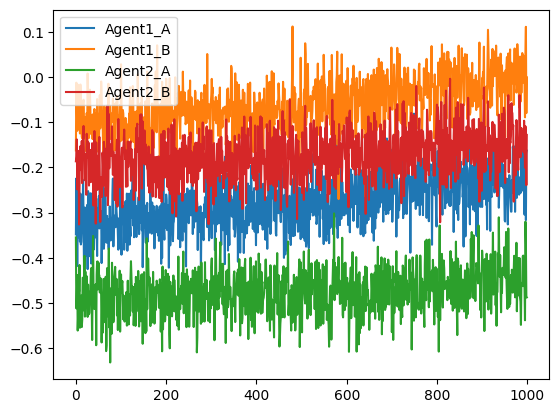

In [62]:
pd.DataFrame(torch.hstack([acts["agent1"],acts["agent2"]]).numpy(),columns=["Agent1_A","Agent1_B","Agent2_A","Agent2_B"]).plot()